In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import glob as gb
import ast

mpl.rcParams['font.size'] = 28
mpl.rcParams['lines.linewidth'] = 3

In [12]:
ks = np.array([5, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 60, 70, 80, 90, 100, 110, 120, 150, 200])
inf_methods = [
	'Gibbs',
	'VEM_est'
]
scores = [
	'umass',
	'uci',
	'npmi',
	'c_a',
	'c_p',
	'c_v'
]
aggreg = [
	'sigma_a',
	'sigma_m'
]
results = np.zeros((len(inf_methods),len(scores),len(ks)))

In [13]:
for file in gb.glob('*'):
	if 'plot_' not in file:
		temp = file.split('_')
		method = temp[0]
		if 'VEM' in method:
			method = method + '_' + temp[1]
			temp = temp[1:]
		tw = int(temp[1])
		agg = temp[2]+'_'+temp[3]
		if agg=='sigma_m' or tw!=10 or method=='VEM_fix':
			continue
		meth_idx = inf_methods.index(method)
		for line in open(file):
			line = line.strip('\n')
			if line!='':
				var,val = line.split('=')
				if var in scores:
					#print('  ',var)
					res = np.array(ast.literal_eval(val))
					sc_idx = scores.index(var)
					results[meth_idx,sc_idx,:] = res

In [14]:
# READING VEM_FIXED
vem_fixed_custom = {}
for file in gb.glob('../ne-vemfixed/*'):
    if 'plot_' not in file:
        x = file.find('VEM')
        conf = file[x+7:]
        
        for line in open(file):
            line = line.strip('\n')
            if line!='':
                var,val = line.split('=')
                if var in scores:
                    #print('  ',var)
                    res = np.array(ast.literal_eval(val))
                    vem_fixed_custom[conf] = res

In [25]:
def plot_metric(ks, metrics, xlab='Number of latent categories', ylab='metric'):
    fig = plt.figure(figsize=(20,12))
    plt.plot(ks, metrics[1], label='VEM estimated alpha', color='r')
    plt.plot(ks[metrics[1].argmax()], metrics[1].max(), '^', color='r')
    
    plt.plot(ks, metrics[2], label='VEM fixed alpha', color='b')
    plt.plot(ks[metrics[2].argmax()], metrics[2].max(), '^', color='b')
    
    plt.plot(ks, metrics[0], label='Gibbs estimated alpha', color='g')
    plt.plot(ks[metrics[0].argmax()], metrics[0].max(), '^', color='g')
    
    std = metrics[0].std()/2
    
    plt.xticks(ks)
    ax = fig.get_axes()[0]
    for label in ax.xaxis.get_ticklabels()[:20][::2]:
        label.set_visible(False)
    
    plt.xlim(ks.min()-2.5, ks.max()+2.5)
    plt.xlabel(xlab)
    plt.ylim(metrics.min()-std, metrics.max()+0.5)
    plt.ylabel(ylab.upper() + ' coherence')
    plt.legend()
    plt.savefig('../../../paper/acl/figures/ne_coh_dimsel.eps', format='eps', dpi=1000)
    plt.show()

In [16]:
def plot_method_score(score,vem_fix_metrics):
    score_idx = scores.index(score)
    metrics = np.vstack([results[:,score_idx,:],vem_fix_metrics])
    
    max_ks = metrics.argmax(1)
    print('Max k: Gibbs:',ks[max_ks[0]])
    print('Max k: VEM_est:',ks[max_ks[1]])
    print('Max k: VEM_fix:',ks[max_ks[2]])
    
    _y_lab = score
    plot_metric(ks, metrics, ylab=_y_lab)

### Umass

Max k: Gibbs: 5
Max k: VEM_est: 10
Max k: VEM_fix: 10


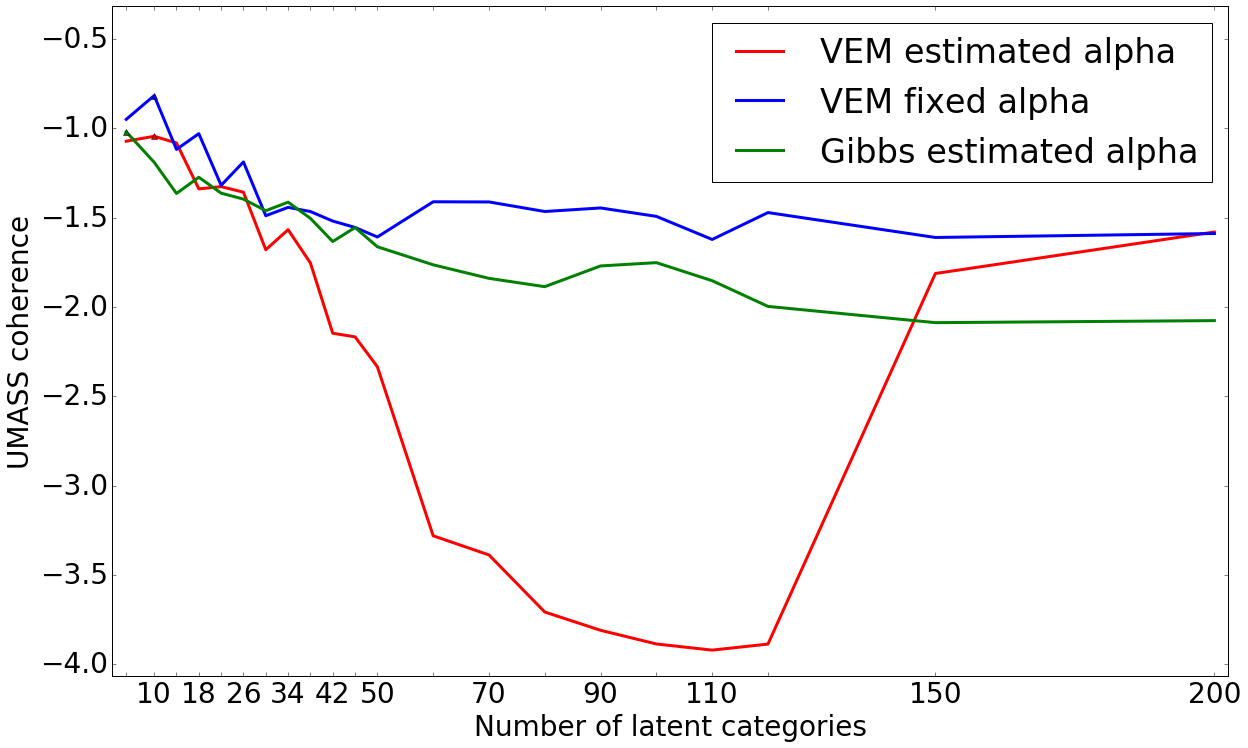

In [28]:
vem_fix = vem_fixed_custom['umass_10_sa']
plot_method_score('umass',vem_fix)

### UCI

Max k: Gibbs: 14
Max k: VEM_est: 10
Max k: VEM_fix: 10


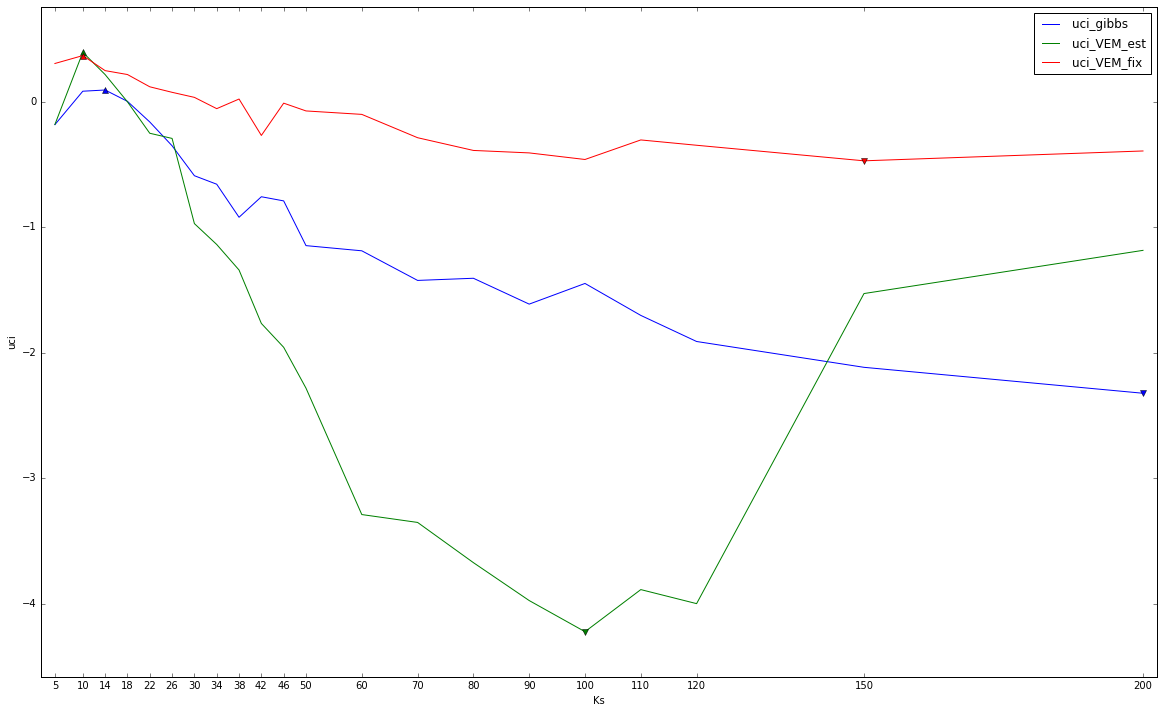

In [10]:
vem_fix = vem_fixed_custom['uci_10_sm']
plot_method_score('uci',vem_fix)

### NPMI

Max k: Gibbs: 14
Max k: VEM_est: 18
Max k: VEM_fix: 10


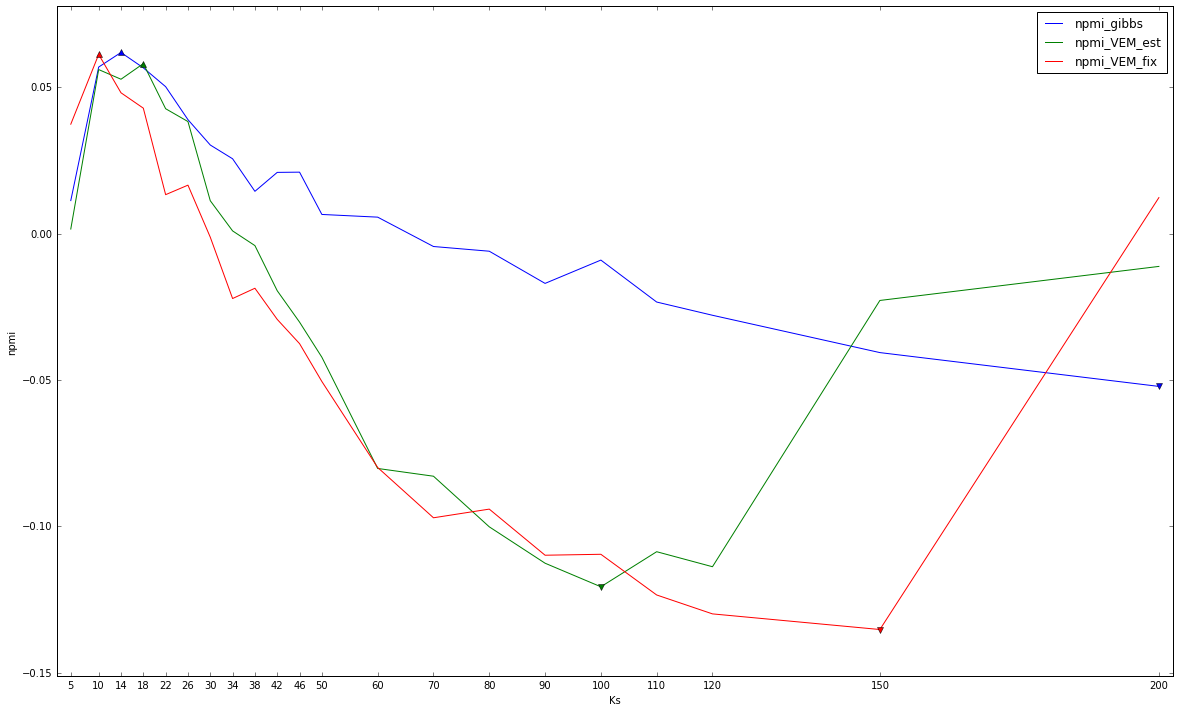

In [11]:
vem_fixed = vem_fixed_custom['npmi_10_sa']
plot_method_score('npmi',vem_fixed)

### C_a

Max k: Gibbs: 38
Max k: VEM_est: 42
Max k: VEM_fix: 5


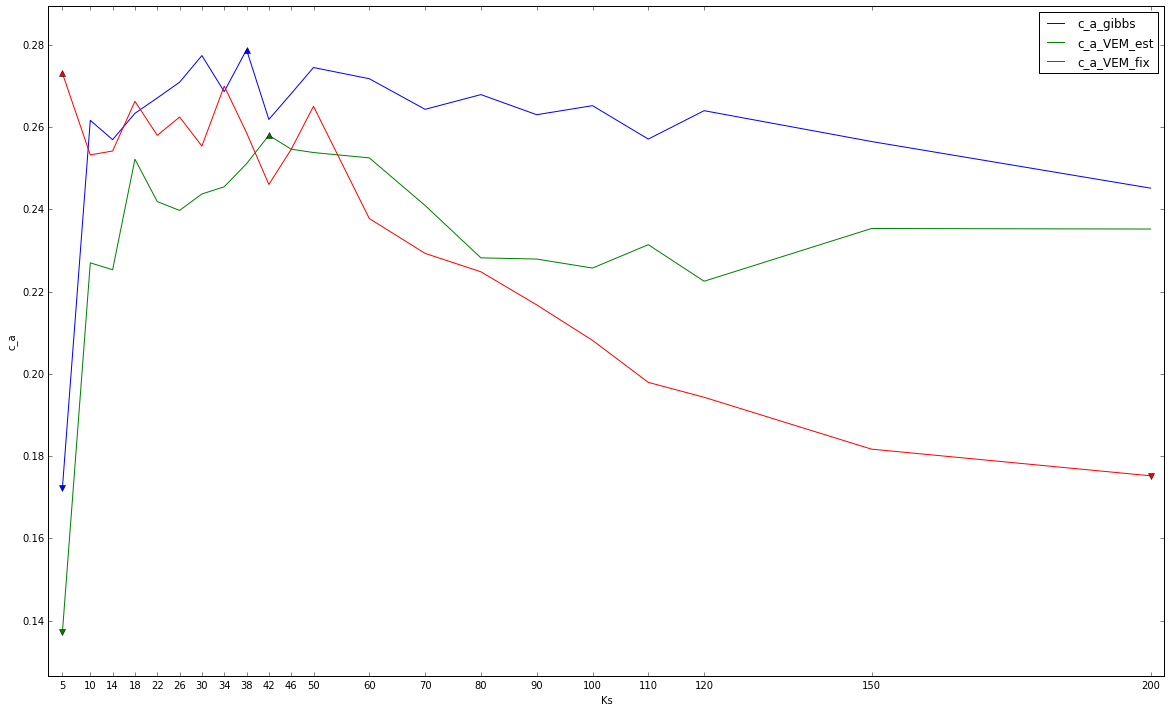

In [12]:
vem_fix = vem_fixed_custom['ca_15_sm']
plot_method_score('c_a',vem_fix)

### C_p

Max k: Gibbs: 22
Max k: VEM_est: 18
Max k: VEM_fix: 18


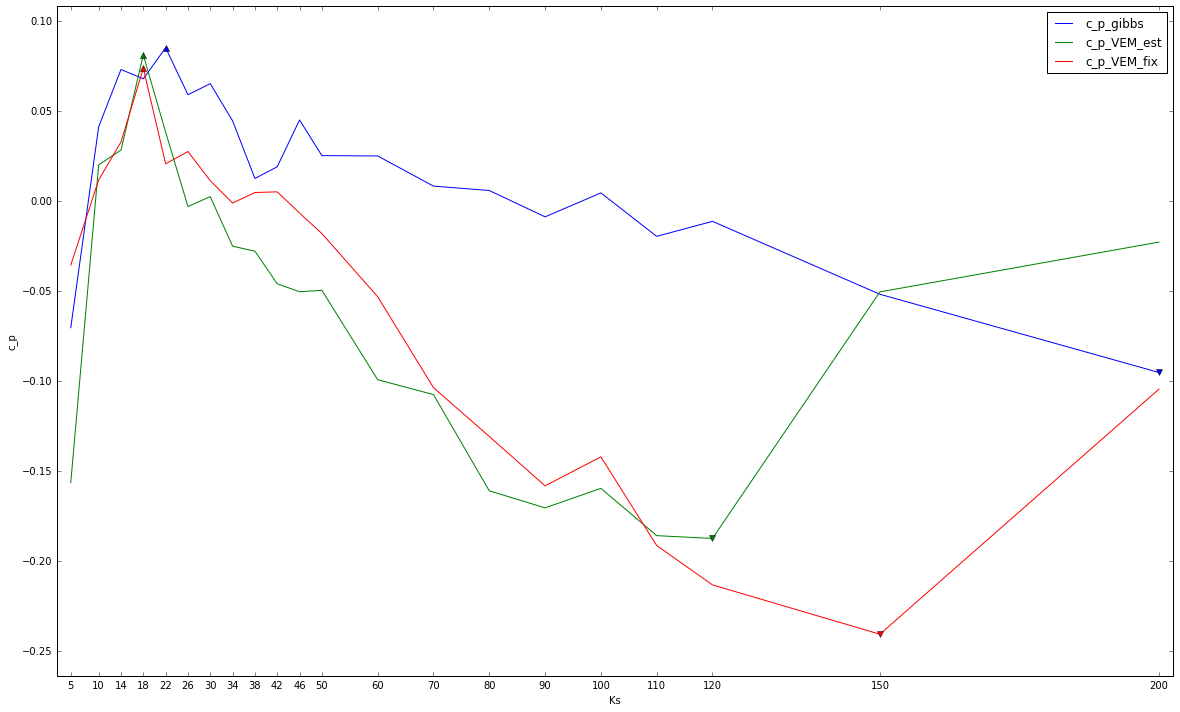

In [13]:
vem_fix = vem_fixed_custom['cp_10_sa']
plot_method_score('c_p',vem_fix)

### C_v

Max k: Gibbs: 70
Max k: VEM_est: 120
Max k: VEM_fix: 150


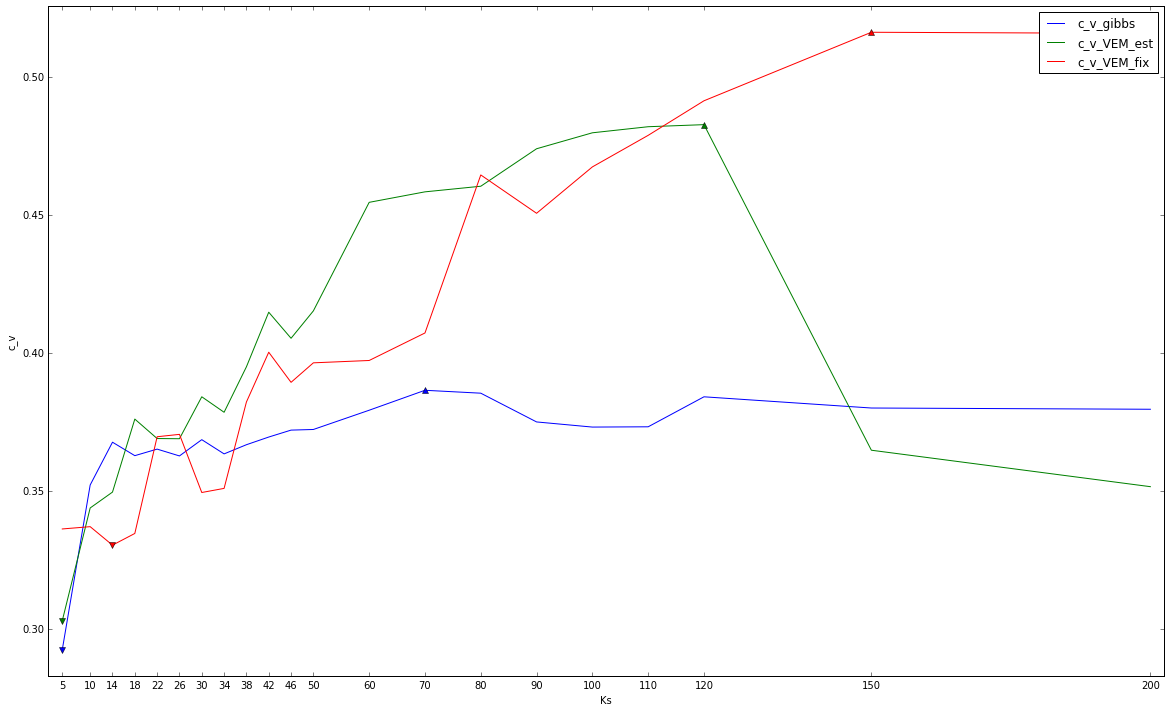

In [14]:
vem_fix = vem_fixed_custom['cv_10_sm']
plot_method_score('c_v',vem_fix)